# Preliminary Data exploration

load dataset. this one includes all the metadata and all NA's

In [196]:
import pandas as pd
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv", encoding='latin-1', index_col=False)


In [ ]:
for item  in df['Gelegenheid']:
    output = 0
    counter = 0
    if len(item) != 0:
        

Text(0.5, 0, 'year of performance')

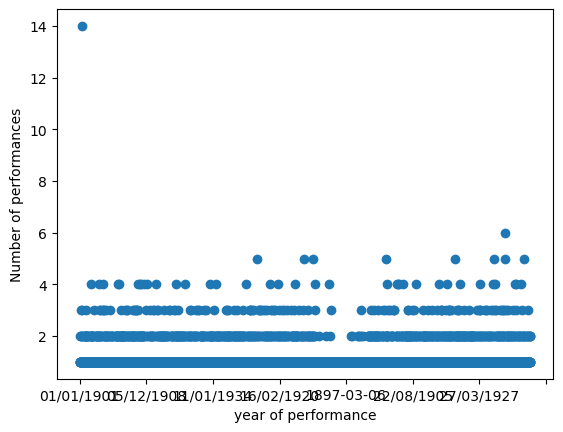

In [164]:
import matplotlib.pyplot as plt
import numpy as np

datum_grouped = df.groupby('Datum')  # group all rows from the same year
performance_counts = datum_grouped.size()  

# compute the size of each group
performance_counts.plot(style='o')  # plot the group size
plt.ylabel("Number of performances")  # add a label to the Y-axis
plt.xlabel("year of performance") # add a label to the X-axis


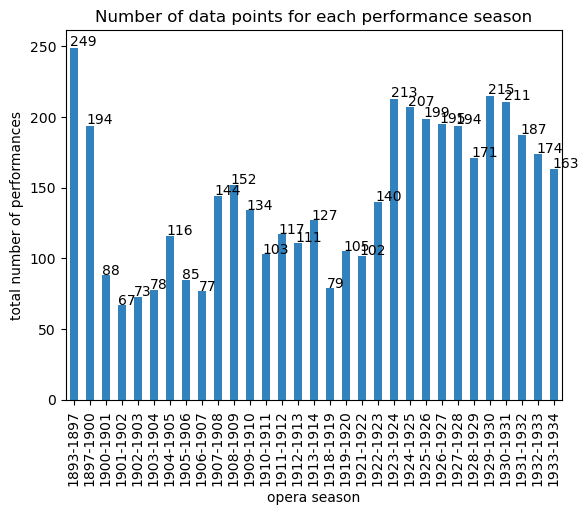

In [165]:
# Count the number of data points for each index
counts = df['Collectie'].value_counts().sort_index(axis=0).plot(kind='bar', colormap='tab20c')

# Add labels and title to the plot
plt.xlabel('opera season')
plt.ylabel('total number of performances')
plt.title('Number of data points for each performance season')

# Plot the counts as a bar chart

for p in counts.patches:
    counts.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

# Show the plot
plt.show()

<AxesSubplot:>

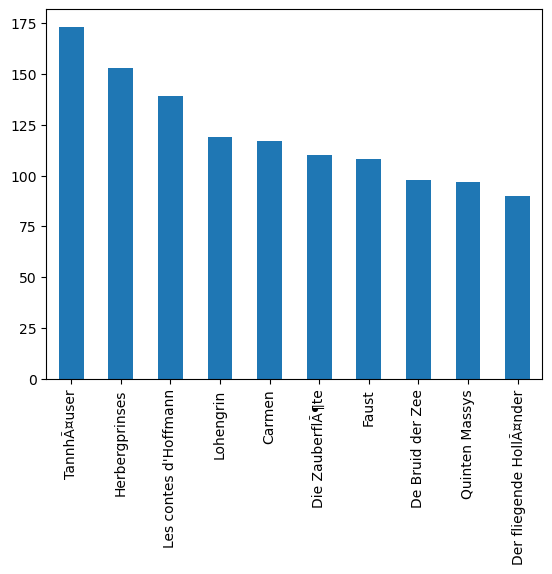

In [166]:
df['Oorspronkelijke titel'].value_counts().head(10).plot(kind='bar')
#top 10 meest gespeelde producties


<AxesSubplot:>

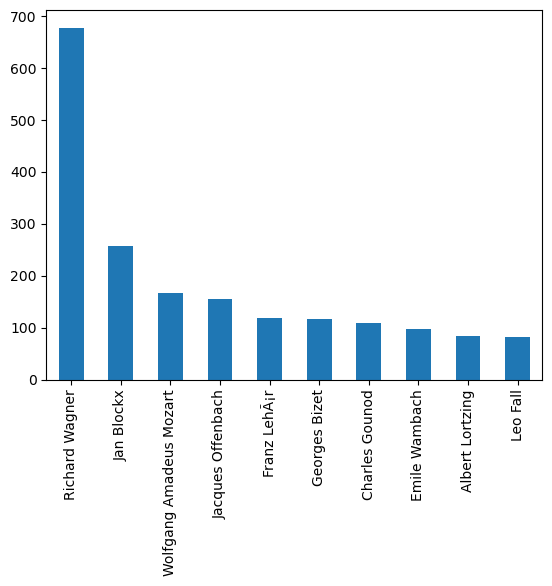

In [167]:
df['Componist'].value_counts().head(10).plot.bar()
#Meer dan 17% van alle voorstellingen waren werken van Wagner

In [168]:
df.head()

,Unnamed: 0,Afbeelding,Collectie,Productie,Datum,Gelegenheid,Multiple bill,Performances_ID,Genormaliseerde titel,Oorspronkelijke taal,Componist,Oorspronkelijke premiÃ¨re,Oorspronkelijke titel,genre,Directie
0,4,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,1893-10-03,Eerste vertoning,False,868868,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der FreischÃ¼tz,romantische oper,Edward Keurvels & Henry Fontaine
1,8,K.V.O. programmas 1893-97_00009-20211201_11343...,1893-1897,Willem Tell,1893-10-05,Eerste vertoning,False,445427,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schillerâs 'Wilhelm Tell,romantische oper,Edward Keurvels & Henry Fontaine
2,10,K.V.O. programmas 1893-97_00011-20211201_11345...,1893-1897,De Vrijschutter,1893-10-10,NaN,False,738479,De Vrijschutter,DUI,Carl Maria von Weber,1821,Der FreischÃ¼tz,romantische oper,Edward Keurvels & Henry Fontaine
3,12,K.V.O. programmas 1893-97_00013-20211201_11351...,1893-1897,Willem Tell,1893-10-12,NaN,False,724410,Willem Tell,DUI,Carl Reinecke,1971,Musik zu Schillerâs 'Wilhelm Tell,romantische oper,Edward Keurvels & Henry Fontaine
4,14,K.V.O. programmas 1893-97_00015-20211201_11352...,1893-1897,Charlotte Corday,1893-11-16,NaN,False,301877,Charlotte Corday,NL,Peter Benoit,?,Charlotte Corday,lyrisch drama,Edward Keurvels & Henry Fontaine


In [187]:
def df2ranking(df, rank_col='frequency', cutoff=20):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['Oorspronkelijke titel'][:cutoff]




In [188]:
table = pd.pivot_table(df, values='Afbeelding', index=['Oorspronkelijke titel'], columns=['Directie'], aggfunc='count')
table

Directie,Edward Keurvels & Henry Fontaine,Flor Alpaerts & Arthur Steurbout,Flor Bosmans,Fé Derickx & Bernard Tokkie,Henry Fontaine,Jef Judels & Bernard Tokkie,Karel van Walle
Oorspronkelijke titel,,,,,,,
\tLe carillonneur de Bruges,5.0,NaN,NaN,NaN,NaN,NaN,NaN
\tÐÐ½ÑÐ·Ñ ÐÐ³Ð¾ÑÑ,NaN,NaN,4.0,NaN,NaN,NaN,NaN
?,6.0,NaN,5.0,39.0,5.0,7.0,4.0
Alcea,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Alessandro Stradella,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
ÐÐµÑÐ½Ð° ÑÐ²ÑÑÐµÐ½Ð½Ð°Ñ,NaN,NaN,NaN,4.0,NaN,NaN,NaN
ÐÐ¸Ð»Ð»ÑÑÐ¼ Ð Ð°ÑÐºÐ»Ð¸ÑÑ,NaN,NaN,NaN,NaN,NaN,NaN,5.0
ÐÐ²Ð³ÐµÐ½Ð¸Ð¹ ÐÐ½ÐµÐ³Ð¸Ð½,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [193]:
for column in table.columns:
    rangs = []
    rangs.append(df2ranking(table, rank_col=column, cutoff=10))

rangs

[0                       De Bruid der Zee
 1                         Herbergprinses
 2                         Quinten Massys
 3                              Cleopatra
 4                            TannhÃ¤user
 5                     Le nozze di Figaro
 6    Till Eulenspiegels lustige Streiche
 7                              Lohengrin
 8                                 Joseph
 9                          Roland Mester
 Name: Oorspronkelijke titel, dtype: object]

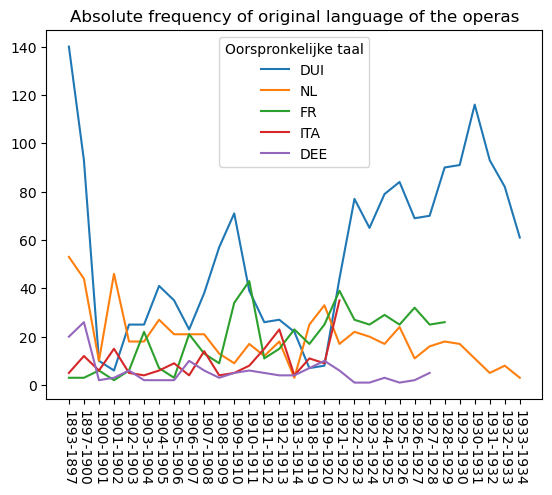

In [170]:
DUI = df[df['Oorspronkelijke taal']=='DUI']
NL = df[df['Oorspronkelijke taal']=='NL']
FR = df[df['Oorspronkelijke taal']=='FR']
ITA = df[df['Oorspronkelijke taal']=='ITA']
DEE = df[df['Oorspronkelijke taal']=='DEE']

Iksas = list(df['Collectie'].unique())
#import matplotlib.pyplot as plt

#plot each series
plt.plot(Iksas, list(DUI.groupby('Collectie')['Oorspronkelijke taal'].value_counts()), label = 'DUI')
plt.plot(list(NL.groupby('Collectie')['Oorspronkelijke taal'].value_counts()),label = 'NL')
plt.plot(list(FR.groupby('Collectie')['Oorspronkelijke taal'].value_counts()),label = 'FR')
plt.plot(list(ITA.groupby('Collectie')['Oorspronkelijke taal'].value_counts()), label = 'ITA')
plt.plot(list(DEE.groupby('Collectie')['Oorspronkelijke taal'].value_counts()),label = 'DEE')
plt.plot()

plt.legend(title='Oorspronkelijke taal')
plt.title('Absolute frequency of original language of the operas')
plt.xticks(rotation=-90)
#display plot
plt.show()

In [13]:
def obtain_rel_freq(taal): #de taal neemt dus de vorm aan van één van die dfs eh dus DUI of NL of ITA ofzo
    rel_freq = []
    total = list(df['Collectie'].value_counts().sort_index(axis=0))
    tal = list(taal.groupby('Collectie')['Oorspronkelijke taal'].value_counts())
    tal = zip(total, tal)
    for item in tal:
        rel_freq.append(item[1]/item[0])
    return rel_freq

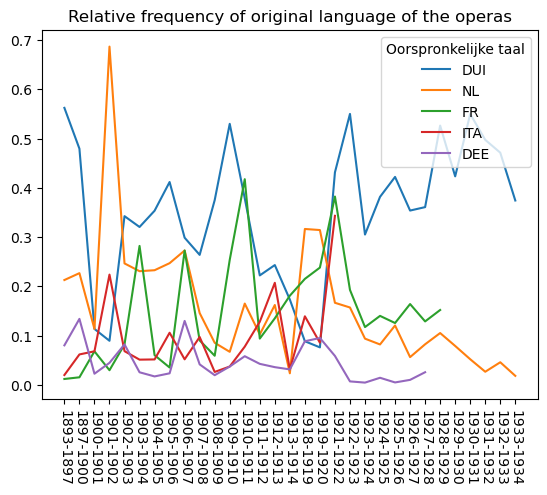

In [14]:
rel_ned = obtain_rel_freq(NL)
rel_dui = obtain_rel_freq(DUI)
rel_fr = obtain_rel_freq(FR)
rel_ita = obtain_rel_freq(ITA)
rel_dee = obtain_rel_freq(DEE)

Iksas = list(df['Collectie'].unique())
#import matplotlib.pyplot as plt

#plot each series
plt.plot(Iksas, rel_dui, label = 'DUI')
plt.plot(rel_ned,label = 'NL')
plt.plot(rel_fr,label = 'FR')
plt.plot(rel_ita, label = 'ITA')
plt.plot(rel_dee,label = 'DEE')
plt.plot()

plt.legend(loc = 'upper right', title='Oorspronkelijke taal')
plt.title('Relative frequency of original language of the operas')
plt.xticks(rotation=-90)
#display plot
plt.show()

In [15]:
len(df.groupby('Oorspronkelijke titel')['Oorspronkelijke première'])

200

In [17]:
eerste_voorkomen = []
for item in df.groupby('Oorspronkelijke titel')['Datum'].min().sort_values():
    eerste_voorkomen.append(item)

len(eerste_voorkomen)

premiere = []
for item in df.groupby('Oorspronkelijke titel')['Oorspronkelijke première'].min():
    print(item)
    #"premiere.append(item)



1852
1890
?
1814
1844
1901
1867
1919
?
?
?
1889
1875
1841
?
?
1894
1868
1912
1916
1896
1862
1923
1931
1834
1869
1911
1875
1901
1920
?
1905
?
1919
1882
1894
1821
1926
1911
1848
1911
1929
1884
1886
1846
1874
1842
1885
1907
1843
1881
1908
1907
1874
1907
1875
1868
1879
1931
1874
1791
1837
1905
1849
1920
1913
1928
1926
1787
1928
1900
1912
1907
1909
1823
1799
1859
1898
1805
1928
1910
1892
1904
1898
1876
?
1833
1896
1893
?
1905
?
1976
1893
1911
1782
1919
1896
1873
1904
?
1807
1926
?
1907
1870
1861
1907
1897
1872
1921
1828
1921
1887
1861
1853
1808
1898
1929
1903
1786
1891
1894
1874
1881
1886
1875
1908
1850
1912
1904
?
?
1847
?
1848
?
1888
?
1971
1831
1890
1826
1911
1786
1858
1891
1925
1892
1887
1882
1902
1908
1821
1903
1913
1899
1851
1906
1930
1886
1899
1907
1898
1889
1871
1810
1853
1927
1890
1922
1912
1933
?
?
1845
1866
1909
1925
?
1903
1895
1900
1860
1859
1845
1903
1911
1899
1984
1902
1831
1837
1910
1874
1913
1869
1879
1903
1882


In [34]:
premiere = pd.to_datetime(pd.Series(premiere), errors='coerce')
premiere

Series([], dtype: datetime64[ns])

In [35]:
print(premiere[0:5])
print(eerste_voorkomen[0:5])

Series([], dtype: datetime64[ns])
['01/01/1901', '01/01/1907', '01/01/1908', '01/01/1909', '01/01/1910']


In [21]:
galas = df[df['Gelegenheid'].astype(str).str.contains("Gala")]

In [22]:
volk = df[df['Gelegenheid'].astype(str).str.contains("Volk")]

<AxesSubplot:>

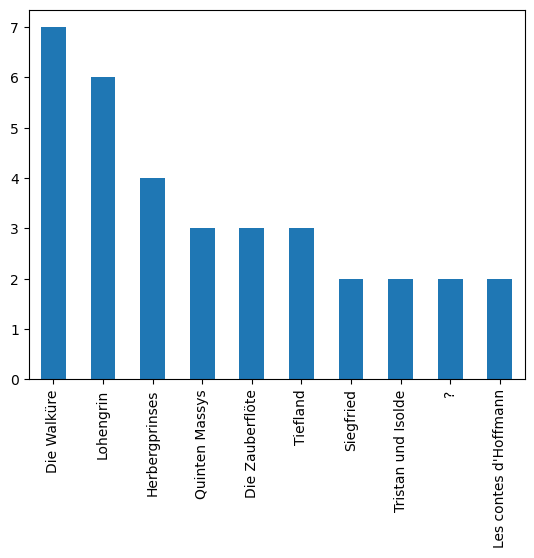

In [23]:
galas['Oorspronkelijke titel'].value_counts().head(10).plot(kind='bar')
#top 10 meest gespeelde producties

<AxesSubplot:>

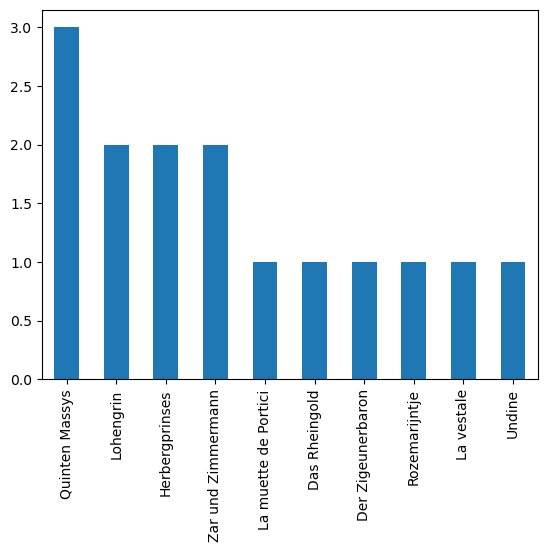

In [24]:
volk['Oorspronkelijke titel'].value_counts().head(10).plot(kind='bar')
#top 10 meest gespeelde producties

<AxesSubplot:>

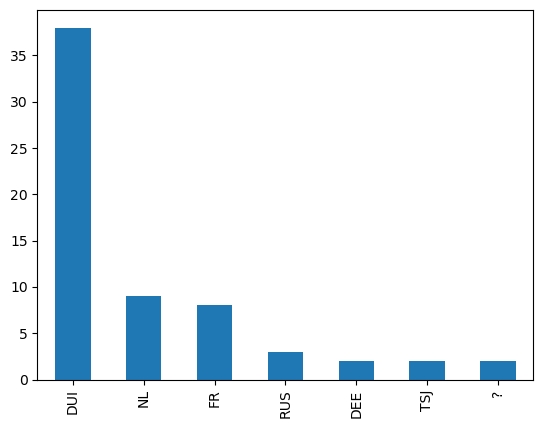

In [30]:
galas['Oorspronkelijke taal'].value_counts().plot(kind='bar')

In [31]:
volksvertoningen = volk['Oorspronkelijke taal'].value_counts()
galavertoningen = galas['Oorspronkelijke taal'].value_counts()

new_df=pd.concat([volksvertoningen, galavertoningen],axis=1)

<AxesSubplot:>

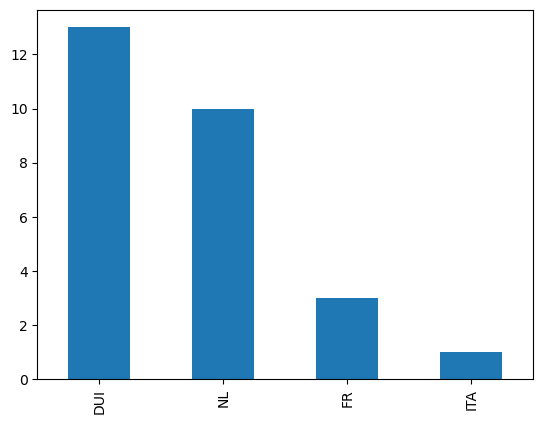

In [32]:
volk['Oorspronkelijke taal'].value_counts().plot(kind='bar', )

In [195]:
len(df)

4470